# Homework 0
In this homework, we will go through basic linear algebra, NumPy, and image manipulation using Python to get everyone on the same page for the prerequisite skills for this class.

One of the aims of this homework assignment is to get you to start getting comfortable searching for useful library functions online. So in many of the functions you will implement, you will have to look up helper functions.

In [66]:
# Imports the print function from newer versions of python
from __future__ import print_function

# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time


# Imports all the methods in each of the files: linalg.py and imageManip.py
from linalg import *
from imageManip import *


# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1: Linear Algebra and NumPy Review
In this section, we will review linear algebra and learn how to use vectors and matrices in python using numpy. By the end of this section, you will have implemented all the required methods in `linalg.py`.

## Question 1.1 (5 points)
First, let's test whether you can define the following matrices and vectors using numpy. Look up `np.array()` for help. In the next code block, define $M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$ 

In [67]:
### YOUR CODE HERE
M = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
a = np.array([[1,1,0]])
b = np.array([[-1],[2],[5]])
### END CODE HERE
print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [[1 1 0]]
The size of a is:  (1, 3)

b =  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## Question 1.2 (5 points)
Implement the `dot_product()` method in `linalg.py` and check that it returns the correct answer for $a^Tb$.

In [68]:
# Now, let's test out this dot product. Your answer should be [[1]].
aDotB = dot_product(a, b)
print(aDotB)

print("The size is: ", aDotB.shape)

[[1]]
The size is:  (1, 1)


## Question 1.3 (5 points)
Implement the `complicated_matrix_function()` method in `linalg.py` and use it to compute $(ab)Ma^T$

IMPORTANT NOTE: The `complicated_matrix_function()` method expects all inputs to be two dimensional numpy arrays, as opposed to 1-D arrays.  This is an important distinction, because 2-D arrays can be transposed, while 1-D arrays cannot.

To transpose a 2-D array, you can use the syntax `array.T` 

In [69]:
# Your answer should be $[[3], [9], [15], [21]]$ of shape(4, 1).
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

The size is:  (4, 1)


In [70]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T
print(M_2.shape)
print(a_2.shape)
print(b_2.shape)
print()

# Your answer should be $[[20], [100]]$ of shape(2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("The size is: ", ans.shape)

(2, 2)
(1, 2)
(2, 1)

[[ 20]
 [100]]

The size is:  (2, 1)


## Question 1.4 (10 points)
Implement `eigen_decomp()` and `get_eigen_values_and_vectors()` methods. In this method, perform eigenvalue decomposition on the following matrix and return the largest k eigen values and corresponding eigen vectors (k is specified in the method calls below).

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [71]:
# Let's define M.
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
# Now let's grab the first eigenvalue and first eigenvector.
# You should get back a single eigenvalue and a single eigenvector.
val, vec = get_eigen_values_and_vectors(M[:,:3], 1)
print("First eigenvalue =", val[0])
print()
print("First eigenvector =", vec[0])
print()
assert len(vec) == 1

# Now, let's get the first two eigenvalues and eigenvectors.
# You should get back a list of two eigenvalues and a list of two eigenvector arrays.
val, vec = get_eigen_values_and_vectors(M[:,:3], 2)
print("Eigenvalues =", val)
print()
print("Eigenvectors =", vec)
assert len(vec) == 2

First eigenvalue = 16.116843969807043

First eigenvector = [-0.23197069 -0.78583024  0.40824829]

Eigenvalues = [-1.30367773e-15  1.61168440e+01]

Eigenvectors = [[-0.8186735   0.61232756  0.40824829]
 [-0.23197069 -0.78583024  0.40824829]]


## Question 1.5 (10 points)

To wrap up our overview of NumPy, let's implement something fun &mdash; a helper function for computing the Euclidean distance between two $n$-dimensional points!

In the 2-dimensional case, computing the Euclidean distance reduces to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$:

![pythagorean.png](pythagorean.png)

...where, given two points $(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.


More generally, given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values.
2. Squaring each of the $n$ difference values, and summing the squares.
4. Taking the square root of our sum.

Alternatively, the Euclidean distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Try implementing this function: first using native Python with a `for` loop in the `euclidean_distance_native()` function, then in NumPy **without any loops** in the `euclidean_distance_numpy()` function.
We've added some `assert`  statements here to help you check functionality (if it prints nothing, then your implementation is correct)!

In [72]:
## Testing native Python function
assert euclidean_distance_native([7.0], [6.0]) == 1.0
assert euclidean_distance_native([7.0, 0.0], [3.0, 3.0]) == 5.0
assert euclidean_distance_native([7.0, 0.0, 0.0], [3.0, 0.0, 3.0]) == 5.0

In [73]:
## Testing NumPy function
assert euclidean_distance_numpy(
    np.array([7.0]),
    np.array([6.0])
) == 1.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0]),
    np.array([3.0, 3.0])
) == 5.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0, 0.0]),
    np.array([3.0, 0.0, 3.0])
) == 5.0

Next, let's take a look at how these two implementations compare in terms of runtime:

In [74]:
n = 1000

# Create some length-n lists and/or n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
start_time = time.time()
for i in range(10000):
    euclidean_distance_native(a, b)
print("Native:", (time.time() - start_time), "seconds")

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(10000):
    euclidean_distance_numpy(a_array, b_array)
print("NumPy:", (time.time() - start_time), "seconds")

Native: 1.0817980766296387 seconds
NumPy: 0.14770054817199707 seconds


As you can see, doing vectorized calculations (i.e. no for loops) with NumPy results in significantly faster computations! 

# Part 2: Image Manipulation 

Now that you are familiar with using matrices and vectors. Let's load some images and treat them as matrices and do some operations on them. By the end of this section, you will have implemented all the methods in `imageManip.py`

In [77]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.
image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)=
    plt.axis('off')
    plt.show()

## Question 2.1 (5 points)
Implement the load method in imageManip.py and read the display method below. We will use these two methods through the rest of the notebook to visualize our work.

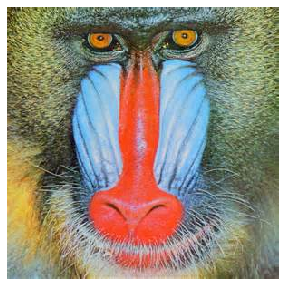

In [79]:
image1 = load(image1_path)

display(image1)

## Question 2.2 (5 points)
One of the most common operations we perform when working with images is rectangular **cropping**, or the action of removing unwanted outer areas of an image.

Take a look at this code we've written to crop out everything but the eyes of our baboon from above:

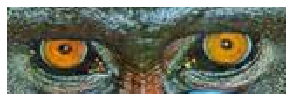

In [82]:
display(image1[10:60, 70:230, :])

Implement the `crop_image()` method by taking in the starting row index, starting column index, number of rows, and number of columns, and outputting the cropped image. 

Then, in the cell below, see if you can pull out a 100x100 square from each corner of the original `image1`: the top left, top right, bottom left, and bottom right.

TypeError: Image data of dtype object cannot be converted to float

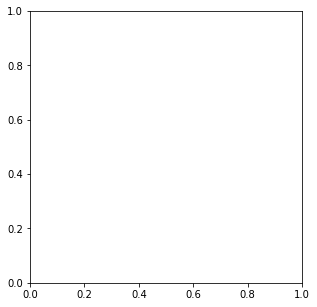

In [81]:
r, c = image1.shape[0], image1.shape[1]

top_left_corner = crop_image(image1, 0, 0, 100, 100)
top_right_corner = crop_image(image1, 0, c-100, 100, 100) 
bottom_left_corner = crop_image(image1, r-100, 0, 100, 100)
bottom_right_corner = crop_image(image1, r-100, c-100, 100, 100) 

display(top_left_corner)
display(top_right_corner)
display(bottom_left_corner)
display(bottom_right_corner)

## Question 2.3 (10 points)
Implement the `dim_image()` method by converting images according to  $x_n = 0.5*x_p^2$ for every pixel, where $x_n$ is the new value and $x_p$ is the original value.

Note: Since all the pixel values of the image are in the range $[0, 1]$, the above formula will result in reducing these pixels values and therefore make the image dimmer.

In [ ]:
new_image = dim_image(image1)
display(new_image)

## Question 2.4 (10 points)
Let's try another commonly used operation: image resizing!

At a high level, image resizing should go something like this:

1. We create an (initially empty) output array of the desired size, `output_image`
2. We iterate over each pixel position `(i,j)` in the output image
    - For each output pixel, we compute a corresponding input pixel `(input_i, input_j)`
    - We assign `output_image[i, j, :]` to `input_image[input_i, input_j, :]`
3. We return the resized output image

We want `input_i` and `input_j` to increase proportionally with `i` and `j` respectively:

- `input_i` can be computed as `int(i * row_scale_factor)`
- `input_j` can be computed as `int(j * col_scale_factor)`

...where `int()` is a Python operation takes a float and rounds it down to the nearest integer, and `row_scale_factor` and `col_scale_factor` are constants computed from the image input/output sizes.

Try to figure out what `row_scale_factor` and `col_scale_factor` should be, then implement this algorithm in the `resize_image()` method! Then, run the cells below to test out your image resizing algorithm!

When you downsize the baboon to 16x16, you should expect an output that looks something like this:

![16_16_baboon.png](16_16_baboon.png)

When you stretch it horizontally to 50x400, you should get:

![50_400_baboon.png](50_400_baboon.png)

In [ ]:
display(resize_image(image1, 16, 16))

In [ ]:
display(resize_image(image1, 50, 400))

**Question:** In the resize algorithm we describe above, the output is populated by iterating over the indices of the output image. Could we implement image resizing by iterating over the indices of the input image instead? How do the two approaches compare?

> *Your response here!*

## Question 2.5 (15 points)

One more operation that you can try implementing is **image rotation**. This is part of a real interview question that we've encountered for actual computer vision jobs (notably at Facebook), and we expect it to require quite a bit more thinking.

#### a) Rotating 2D coordinates (5 points)

Before we start thinking about rotating full images, let's start by taking a look at rotating `(x, y)` coordinates:

![coordinate_rotation.png](coordinate_rotation.png)

Using `np.cos()` and `np.sin()`, implement the `rotate2d()` method to compute the coordinates $(x', y')$ rotated by theta radians from $(x, y)$ using the lecture slides. 

Once you've implemented the function, test your implementation below using the assert statements (if it prints nothing, then your implementation is correct):

In [ ]:
assert rotate2d(np.array([1.0, 0.0]), 0.0).shape == (
    2,
), "Output shape incorrect!"
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), 0.0), np.array([1.0, 0.0])
), ""
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), np.pi / 2.0), np.array([0.0, 1.0])
), ""

Run the cell below to visualize a point as it's rotated around the origin by a set of evenly-spaced angles! You should see 30 points arranged in a circle.

In [ ]:
# Visualize a point being rotated around the origin
# We'll use the matplotlib library for this!
import matplotlib.pyplot as plt

points = np.zeros((30, 2))
for i in range(30):
    points[i, :] = rotate2d(np.array([1.0, 0.0]), i / 30.0 * (2 * np.pi))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

**Question:** Our function currently only rotates input points around the origin (0,0). Using the same `rotate2d` function, how could we rotate the point around a center that wasn't at the origin? **You'll need to do this when you implement image rotation below!**

> *Your response here!*

#### b) Rotate Image (10 points)

Finally, use what you've learned about 2D rotations to create and implement the `rotate_image(input_image, theta)` function!

For an input angle of $\pi/4$ (45 degrees), the expected output is:

![rotated_output.png](rotated_output.png)

**Hints:**
- We recommend basing your code off your `resize_image()` implementation, and applying the same general approach as before. Iterate over each pixel of an output image `(i, j)`, then fill in a color from a corresponding input pixel `(input_i, input_j)`. In this case, note that the output and input images should be the same size.
- If you run into an output pixel whose corresponding input coordinates `input_i` and `input_j` that are invalid, you can just ignore that pixel or set it to black.
- In our expected output above, we're rotating each coordinate around the center of the image, not the origin. (the origin is located at the top left)

In [ ]:
## Test that your output matches the expected output
display(rotate_image(image1, np.pi / 4.0))